<a href="https://colab.research.google.com/github/quickish007/pytorch-fashion-mnist-gpu/blob/main/GPU_ann_fashion_mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [ ]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [ ]:
# Check for GPU avaibility

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"using device: {device}")

using device: cuda


In [ ]:
df = pd.read_csv('https://media.githubusercontent.com/media/quickish007/Data/refs/heads/main/fashion-mnist_train.csv')

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


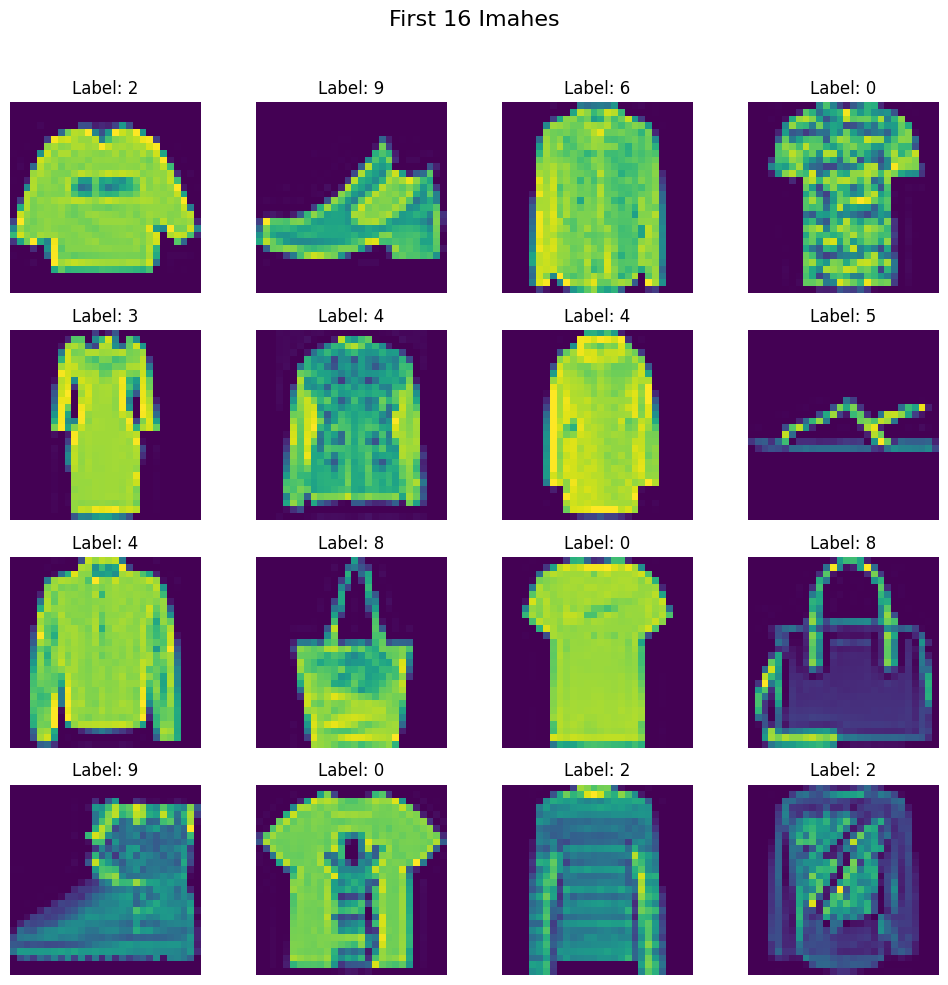

In [ ]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Imahes", fontsize=16)

# Plot with first 16 images from the database
for i, ax in enumerate(axes.flat):
  img = df.iloc[i, 1:].values.reshape(28, 28)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(f"Label: {df.iloc[i, 0]}")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [ ]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling the features
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.        ]])

In [ ]:
# Custom dataset class

class CustomDataset (Dataset):

  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]

In [ ]:
# create train_Dataset object
train_dataset = CustomDataset(X_train, y_train)

In [ ]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2275,
         0.5333, 0.0000, 0.0

In [ ]:
test_dataset = CustomDataset(X_test, y_test)

In [ ]:
# Create train ans test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True )

In [ ]:
# Define NN class
class MyNN(nn.Module):

  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, x):
      return self.model(x)

In [ ]:
# Set learning rate ans epochs

epochs = 100
learning_rate = 0.1

In [ ]:
# instantiate the model
model = MyNN(X_train.shape[1])
model = model.to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    # Forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # Upadte grad
    optimizer.step()

    total_epoch_loss += loss.item()

  avg_loss = total_epoch_loss / len(train_loader)
  print(f'Epoch [{epoch+1}], Loss: {avg_loss}')

Epoch [1], Loss: 0.6352872455318769
Epoch [2], Loss: 0.4304986933817466
Epoch [3], Loss: 0.38612620331346986
Epoch [4], Loss: 0.3584607186516126
Epoch [5], Loss: 0.3376494685560465
Epoch [6], Loss: 0.3227646785800656
Epoch [7], Loss: 0.30785389595727125
Epoch [8], Loss: 0.29498188248028356
Epoch [9], Loss: 0.2854692431092262
Epoch [10], Loss: 0.27467057487616936
Epoch [11], Loss: 0.26830568559716145
Epoch [12], Loss: 0.25814215187107525
Epoch [13], Loss: 0.24940819021190205
Epoch [14], Loss: 0.24444738084822892
Epoch [15], Loss: 0.23859191479658087
Epoch [16], Loss: 0.23155898495018482
Epoch [17], Loss: 0.22562562109405795
Epoch [18], Loss: 0.220296459933122
Epoch [19], Loss: 0.21206333881616593
Epoch [20], Loss: 0.20960091057543953
Epoch [21], Loss: 0.20624992236122489
Epoch [22], Loss: 0.19986102367161462
Epoch [23], Loss: 0.19530413204431535
Epoch [24], Loss: 0.19312162966746838
Epoch [25], Loss: 0.18764106344679993
Epoch [26], Loss: 0.1836644180783381
Epoch [27], Loss: 0.1801829884

In [ ]:
# Set model to evaluation mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluation code

total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    # Forward pass
    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]
    correct = correct + (predicted == batch_labels).sum().item()

print(f'Accuracy: {(correct / total) * 100:.2f}%')

Accuracy: 88.98%
